In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
import csv


In [187]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('mode.chained_assignment', None)


In [8]:
# Importinmg data 
# file with n-gram counts
file1 = "googlebooks-eng-all-1gram-20120701-1"

# file with total counts
file2 = "googlebooks-eng-all-totalcounts-20120701.txt"

### Data Cleaning and Subsetting

In [9]:
### subset data from file1 ###
# Read file1 line by line
# subset the data such that:
# 1) the n-grams are = '1883', '1910' and '1950';
# 2) the year is between 1850 and 2001
# store the rows which staisfy these 2 in conditions in 'subset' as a list of lists

with open(file1) as infile:
    subset = []
    for line in infile:
        row = line.rstrip('\n').split('\t')
        if (row[0] == '1883' or row[0] =='1910' or row[0] == '1950') and (int(row[1]) in list(range(1850,2001))):
            subset.append(row)


In [10]:
# Make a dataframe using 'subset'
# column name assignment is based on the description on Google Books Ngram Viewer
#(ngram) TAB (year) TAB (match_count) TAB (volume_count) NEWLINE

NGram = pd.DataFrame(columns=['1gram','year','match_count','volume_count'], data = subset)

In [11]:
# Convert all columns to int
NGram.dtypes
NGram = NGram.astype('int')

In [12]:
### Read file2 which has tot_counts data ###
# create a list of lists

with open(file2) as f:
    totcounts = []
    reader=csv.reader(f,delimiter='\t')
    for line in reader:
        for item in line:
            row = item.split(',')
            totcounts.append(row)
        


In [13]:
# totcounts[1:426]

In [14]:
# Create a dataframe for total_counts data stored in 'totcounts' above
# The column names follow the description given on Google Books Ngram Viewer
# One triplet of values (match_count, page_count, volume_count) per year

Totcounts = pd.DataFrame(columns=['year','match_count', 'page_count', 'volume_count'],data=totcounts[1:426])

In [15]:
# Convert all columns to int
Totcounts.dtypes
Totcounts = Totcounts.astype('int')

In [16]:
# Totcounts

In [17]:
# Subset 'Totcounts' such that it only contains information on years between 1850 and 2000
Totcounts_1850_2000 = Totcounts[(Totcounts['year']>=1850) & (Totcounts['year']<=2000)]

In [18]:
#Totcounts_1850_2000

In [19]:
# Creat a different dataframe associated with each of the three 1-grams in question -- '1883', '1910', '1950'
y1883 = NGram[NGram['1gram']==1883]
y1910 = NGram[NGram['1gram']==1910]
y1950 = NGram[NGram['1gram']==1950]

In [20]:
# Checking if subseting is correct
len(Totcounts_1850_2000) == len(NGram)/3


True

In [21]:
# Extract the column match_count from Totcounts_1850_2000
# match_count gives the total number of words in the corpus in a particular year -- this is required to calculate the frequency
tot_match_count=Totcounts_1850_2000.loc[:,'match_count'].tolist()

In [22]:
len(tot_match_count)

151

In [188]:
# attach total match_count to each of three data frames

y1883['tot_match_count']=tot_match_count
y1883['frequency']=(y1883['match_count']/y1883['tot_match_count'])*10000

In [189]:
y1910['tot_match_count']=tot_match_count
y1910['frequency']=(y1910['match_count']/y1910['tot_match_count'])*10000

In [190]:
y1950['tot_match_count']=tot_match_count
y1950['frequency']=(y1950['match_count']/y1950['tot_match_count'])*10000

### Part (b)
Recreate Figure 3a. How similar are the results?


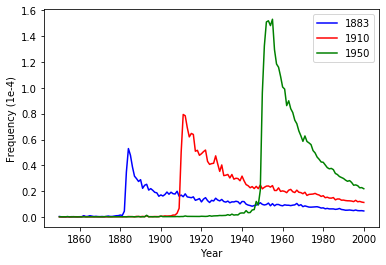

In [346]:
# Plot frequencies 

plt.plot(y1883['year'],y1883['frequency'],color="blue" )
plt.plot(y1910['year'],y1910['frequency'],color="red" )
plt.plot(y1950['year'],y1950['frequency'],color="green" )
plt.legend(['1883', '1910', '1950'], loc='upper right')
plt.xlabel('Year')
plt.ylabel('Frequency (1e-4)')
plt.show()


Yes, version 2 of the NGram data produce similar results to those presented in Michel et al. (2011), which are based on version 1 data.  

### Part (c) 

I checked the graph against the graph created by the NGram Viewer. The result looks similar, with the increase in use and peaks matching almost exactly to the years in the NGram Viewer.


### Part (d)
Recreate figure 3a, but use raw mention count rather than the rate of mentons.

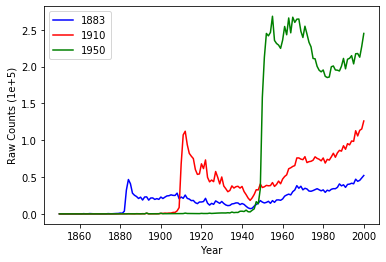

In [186]:
# Plot frequencies 

plt.plot(y1883['year'],(y1883['match_count']/100000),color="blue" )
plt.plot(y1910['year'],(y1910['match_count']/100000),color="red" )
plt.plot(y1950['year'],(y1950['match_count']/100000),color="green" )
plt.legend(['1883', '1910', '1950'], loc='upper left')
plt.xlabel('Year')
plt.ylabel('Raw Counts (1e+5)')
plt.show()


### Part (f)
Now, using the proportion of mentions, replicate the inset of figure 3a.


In [44]:
# Filter all 1-grams between years 1875 and 1975
yrs = list(range(1875,1976))

yr_grams = [str(num) for num in yrs]

In [46]:
with open(file1) as infile:
    subset = []
    for line in infile:
        row = line.rstrip('\n').split('\t')
        if (row[0] in yr_grams) and (int(row[1]) in list(range(1870,2009))):
            subset.append(row)


In [79]:
yr_grams_df = pd.DataFrame(columns=['1gram','year','match_count','volume_count'], data = subset)


In [86]:
yr_grams_df.dtypes
yr_grams_df = yr_grams_df.astype('int')

In [90]:
# add the column for total counts of 1-grams in the yearly corpus
yr_grams_df['tot_match_count'] = yr_grams_df['year'].map(Totcounts.set_index('year')['match_count'])


In [97]:
# calculate frequency for each 1-gram 
yr_grams_df['frequency'] = yr_grams_df['match_count']/yr_grams_df['tot_match_count']

In [152]:
half_lives = []
for year in list(range(1875,1975)):    
    
    df = yr_grams_df[yr_grams_df['1gram']==year]
    
    peak_freq = max(df['frequency'])
    peak_index = np.where(df["frequency"] == peak_freq)[0][0]
    peak_year = 1870 + peak_index
    
    
    half_freq = peak_freq/2
    half_life = np.where(df[df['year']>peak_year]["frequency"] < half_freq)[0][0]
    
    half_lives.append(half_life)

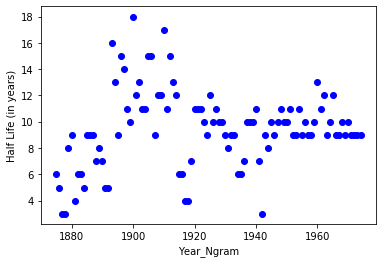

In [181]:

plt.scatter(list(range(1875,1975)),half_lives,color= "blue" )
plt.xlabel('Year_Ngram')
plt.ylabel('Half Life (in years)')
plt.show()


Does version 2 of the NGram data produce similar results to those presented in Michel et al. (2011), which are based on version 1 data?

No, there doesn't seem to be a clear pattern in the graph above. This is different from the plot which is depited in Michel et al.'s 2011 paper that shows a clear downward trajectory in half lives.
